<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Data_Science_Core_W9_KNN_NaiveBayes_2021_12_Faith_Rotich_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

This week's project requires the implementation of the K-nearest neighbor (kNN) classifier, a Naive Bayes classifier and calculating the resulting metrics after the experiments. 


Experimental Procedure:

Datasets

Dataset 1 Source: 

Train Dataset Source: https://archive.org/download/train5_202002/train%20%285%29.csv

Test Dataset Source: Link - https://archive.org/download/test1_202002/test%20%281%29.csv

Dataset 2 Source: Link - https://archive.ics.uci.edu/ml/datasets/Spambase

Steps

Randomly partition each dataset into two parts i.e 80 - 20  sets.
For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

Provide further recommendations to improve both classifiers.

a) Defining the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

b) Metric for Success

Clean dataset

Exploratory Data Analysis

Baseline Model - Linear Regression

KNN Classifier

Naive Bayes Classifier - Bernoulli Naive Bayes. Why? It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .


c) Validating the data

Challenge the solution by providing insights on how you can make improvements in model improvement.

d) Experimental Design

Data preparation

Data analysis

Data modeling

# 2. Reading the Data

In [1]:
# Importing python libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

In [3]:
# This is the data we will split further for modelling

# I will also use this as a copy for the EDA 
titanic = train

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# This is the test data to test the model performance. 
# It has no target variable column

test_set = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

In [6]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Checking the Data

In [7]:
# Checking the size of the data 

titanic.shape

(891, 12)

In [8]:
# Statistical Summary 

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Checking the columns 

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#  Checking the size of the test set 

# The test set has no target variable 

test_set.shape

(418, 11)

# 4. External Data Validation

Data is the popular Titanic dataset and is valid in comparison to similar ones online

# 5. EDA

In [12]:
# Univariate Analysis

In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Pie chart to show those who survived verses those who didn't survive
# Def
def univariate_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2, palette='PuBuGn_r')
  if kind == 'pie':
    titanic[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize=(8, 6), rot=90)
  elif kind == 'bar':
    titanic[column].value_counts().plot(kind=kind, figsize=(8, 6), rot=90)
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1)
  return plt.show()


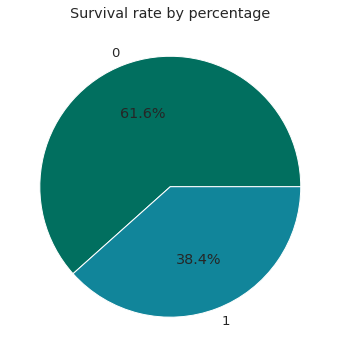

In [15]:
univariate_visuals('Survived', 'pie', 'Survival rate by percentage', '', '')
# 38.4% of the passengers survived

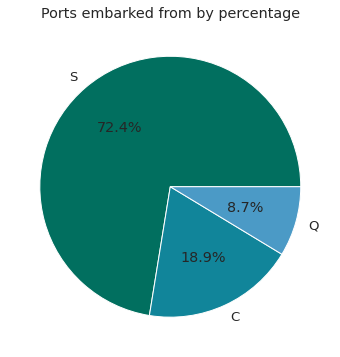

In [16]:
univariate_visuals('Embarked', 'pie', 'Ports embarked from by percentage', '', '')

In [17]:
# Bivariate Analysis

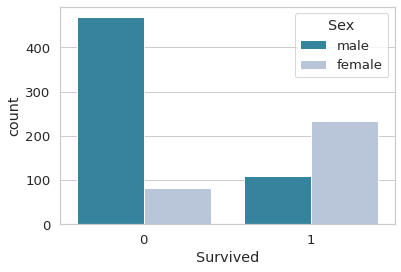

In [18]:
# Survival Rate by Gender 

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='PuBuGn_r')

From the graph above, females seemed to have had a better chance of survival 

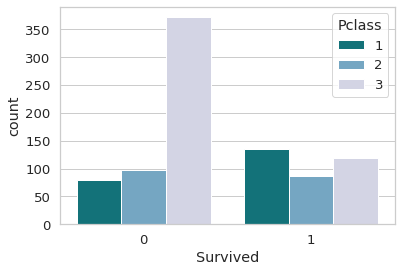

In [19]:
# Survival Rate by passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='PuBuGn_r')

Passengers in Pclass 3 had the least chance of survival compared to passengers in Pclass 1 who has the highest chance of survival 

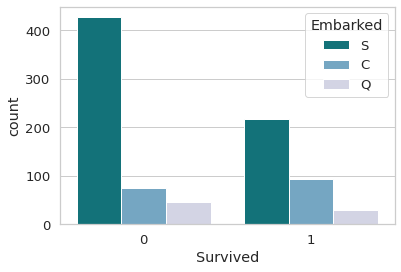

In [20]:
# Survival Rate by passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=titanic,palette='PuBuGn_r')

In [21]:
# Multivariate Analysis 

# 6. Data Cleaning Procedures

In [22]:
# Check for missing values 

titanic.isnull().sum().sort_values(ascending=False) / titanic.shape[0] * 100

# The cabin column has 77% missing data. 

# The Embarked column has 2 missing values which can be dropped

# The Age has 19.8% missing data which can be filled with the mean

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [23]:
# Checking the datatypes

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [26]:
titanic.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

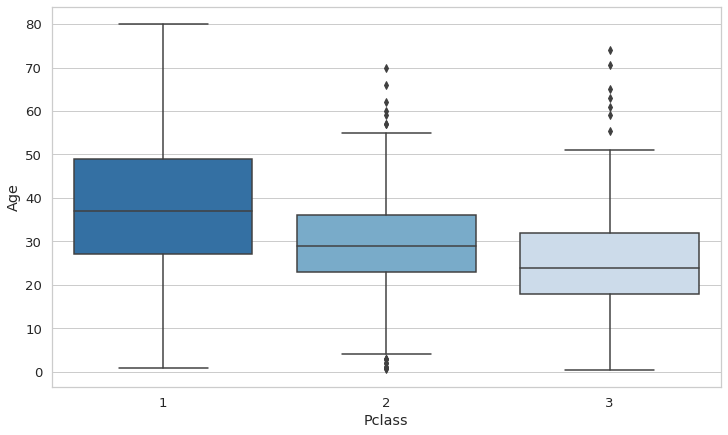

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='Blues_r')

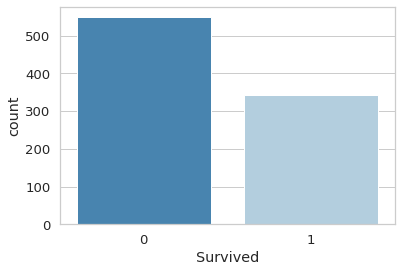

In [28]:
# Count plot of those who survived Vs those who did not survive 

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='Blues_r')

In [29]:
# Dropping the PassengerID, Name, Ticket columns because these would not affect the survival rate. 
# Dropping the Cabin column as well since it's mostly empty

titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)

In [30]:
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [31]:
# Function to fill the missing values in the Age column with mean

def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37 

        elif Pclass==2:
            return 29 

        else: 
            return 24 

    else: 
        return Age

In [34]:
# Converting categorical values to numerical values in order to model

In [32]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train_data = titanic.apply(LabelEncoder().fit_transform)

In [33]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


# 7. Implementing the Solution

## K-nearest Classification Model 

In [40]:
# This is a classification challenge

In [41]:
# Splitting our dataset
#
X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
# Using the model to make a prediction


y_pred= knn.predict(X_test)

In [44]:
# Evaluating the model

from sklearn.metrics import confusion_matrix, classification_report 
my_confusion_matrix = confusion_matrix(y_test, y_pred)
my_classification_report = classification_report(y_test,y_pred)
print(my_confusion_matrix)
print(my_classification_report)

[[84 26]
 [30 39]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       110
           1       0.60      0.57      0.58        69

    accuracy                           0.69       179
   macro avg       0.67      0.66      0.67       179
weighted avg       0.68      0.69      0.69       179



In [45]:
error_rate = []


for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

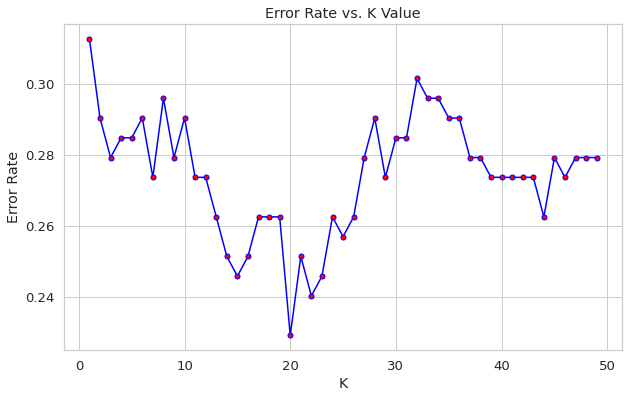

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='solid', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[100  10]
 [ 34  35]]


              precision    recall  f1-score   support

           0       0.75      0.91      0.82       110
           1       0.78      0.51      0.61        69

    accuracy                           0.75       179
   macro avg       0.76      0.71      0.72       179
weighted avg       0.76      0.75      0.74       179



Using n_neighbours as 15, gives the model an accuracy score of 15 which is quite decent

## Hyperparameter Tuning

In [64]:
# List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
# Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# Create new KNN object
knn_2 = KNeighborsClassifier()
# Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
# Fit the model
best_model = clf.fit(X,y)
# Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 1
Best n_neighbors: 15


Best n_neighbors is 15 which confirms our initial intuition to use 15 in the model 

# 8. Challenging the Solution

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73333333 0.78651685 0.64044944 0.59550562 0.70786517 0.74157303
 0.70786517 0.69662921 0.6741573  0.71910112]


K-FOLD CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
[0.73333333,0.78651685,0.64044944, 0.59550562, 0.70786517, 0.74157303,
 0.70786517, 0.69662921, 0.6741573,  0.71910112]
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

[0.73333333 0.78651685 0.64044944 0.59550562 0.70786517 0.74157303
 0.70786517 0.69662921 0.6741573  0.71910112]
Score of Model 0 : 70.03
Score of Model 1 : 100.0
Score of Model 2 : 100.0
Score of Model 3 : 100.0
Score of Model 4 : 67.34
Score of Model 5 : 98.99
Score of Model 6 : 100.0
Score of Model 7 : 100.0
Score of Model 8 : 100.0


K neighbours classifier which is model 0 in this case, gives us the best score at 70%. 

The Decision Tree and Random Forest Classifiers are overfitting in this case. 

## Naive Bayes Classifier

In [ ]:
# Load libraries and datasets to be used in this example
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting our dataset
#
X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

In [ ]:
# Splitting our data into a training set and a test set
# 
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

In [ ]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
import numpy as np

In [ ]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7761194029850746


In [ ]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0


In [ ]:
# Predicting a new observation
new_observation = [[ 2, 0, 92, 1, 0, 18, 2]]

new_prediction = model.predict(new_observation)
new_prediction

array([1])

Bernoulli

In [ ]:
# Splitting our dataset
#
X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

In [ ]:
# Splitting our data into a training set and a test set
# 
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)

0.7867564534231201

The K-nearest classification model gives the best accuracy at 70%